# Credit Card Fraud Detection

## Problem Statement:

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

#### DataSet : 

The dataset that is used for credit card fraud detection is derived from the following Kaggle URL : [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

#### Observations

- The data set is highly skewed, consisting of `492` frauds in a total of `284,807` observations. This resulted in only `0.172%` fraud cases. This skewed set is justified by the low number of fraudulent transactions.
- The dataset consists of numerical values from the `28` ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
- The ‘Time’ and ‘Amount’ features are not transformed data.
- There is no missing value in the dataset.

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

#### Business questions to brainstorm:
Since all features are anonymous, we will focus our analysis on non-anonymized features: `Time`, `Amount`
1. How different are the amount of money used in different transactions classes?
2. Do fraudulant transactions occur more often during certain frame?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:
- `Time`
- `Amount`
- `Class` (1: fraud, 0: not_fraud)

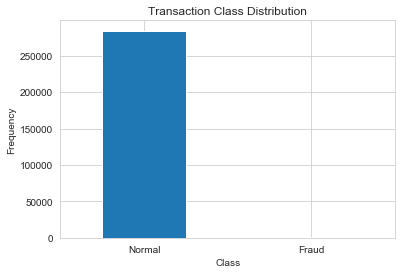

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Determine the number of fraud and valid transactions in the entire dataset.

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [10]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [11]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [12]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


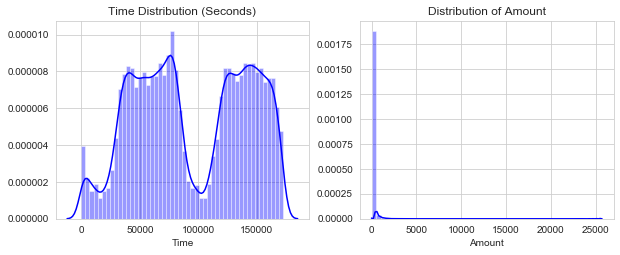

In [13]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

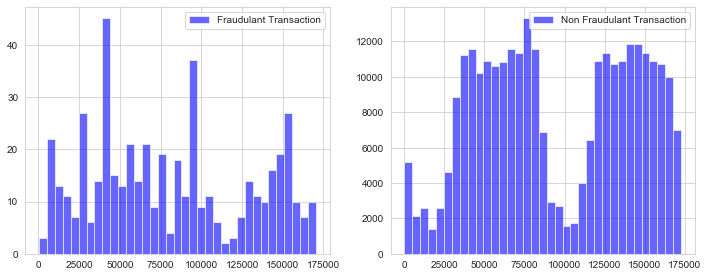

In [14]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation.
Now let us take a sample of the dataset for out modelling and prediction

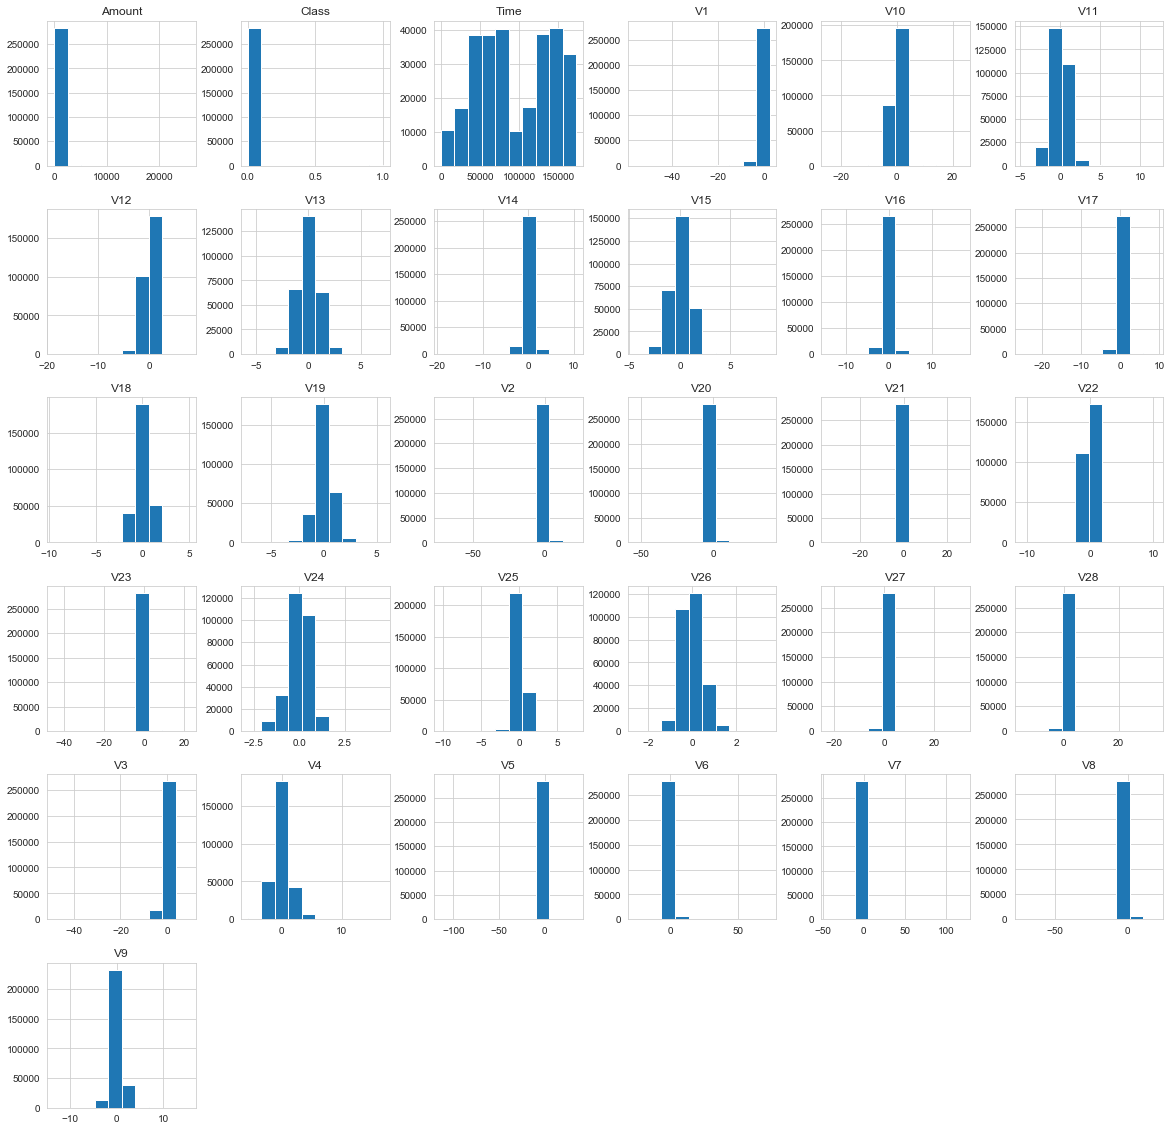

In [15]:
data.hist(figsize=(20, 20));

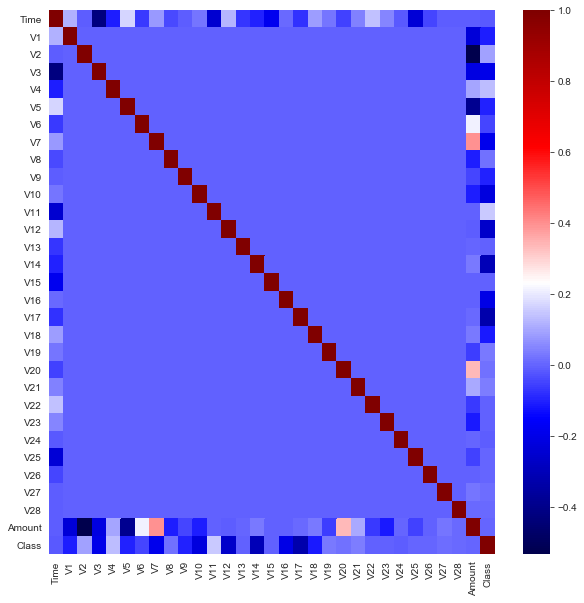

In [19]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:
    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

- While these correlations are high, I don't expect it to run the risk of multicollinearity.

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

### Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [20]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data["Amount"] = scalar.fit_transform(data["Amount"].values.reshape(-1, 1))
data["Time"] = scalar.fit_transform(data["Time"].values.reshape(-1, 1))

In [21]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0.24,0
1,-2.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,-0.34,0
2,-2.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,1.16,0
3,-2.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0.14,0
4,-2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,-0.07,0


In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# Model Building (Imbalanced Dataset)

# 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

logistic_grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train, y_train)

y_train_pred = logistic_grid.predict(X_train)
y_test_pred = logistic_grid.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


In [25]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:	Precision Score: 88.45%
			Recall Score: 62.36%
			F1 score: 73.15%
_______________________________________________
Confusion Matrix: 
 [[198979     29]
 [   134    222]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:	Precision Score: 87.76%
			Recall Score: 63.24%
			F1 score: 73.50%
_______________________________________________
Confusion Matrix: 
 [[85295    12]
 [   50    86]]



# 2. Random Forest Classifier

In [70]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [71]:
fraudulant = y_train.value_counts()[1] / y_train.shape[0]
non_fraudulant = y_train.value_counts()[0] / y_train.shape[0]

In [72]:
class_weight = {0: non_fraudulant, 1: fraudulant}

In [73]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[100, 250, 500, 750, 1000, 1500],
#               'max_depth':[3, None], 
#               'min_samples_split':[2, 3, 10], 
#               'min_samples_leaf':[1, 3, 10], 
#               'bootstrap':[True, False], 
#               'criterion':["gini", "entropy"]
             }

rf_clf = RandomForestClassifier(random_state=42, 
                                oob_score=True, 
                                bootstrap=True, 
                                class_weight=class_weight)

grid_cv_rf = GridSearchCV(rf_clf, param_grid, scoring="roc_auc", n_jobs=-1,
                                verbose=1, cv=3)
grid_cv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 173.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.9982143215425051,
                                                            1: 0.0017856784574948336},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
         

In [74]:
grid_cv_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9982143215425051,
                                     1: 0.0017856784574948336},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [75]:
rf_clf = RandomForestClassifier(n_estimators=1500,
                                random_state=42, 
                                oob_score=True, 
                                bootstrap=True, 
                                class_weight=class_weight)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 98.88%
			F1 score: 99.44%
_______________________________________________
Confusion Matrix: 
 [[199008      0]
 [     4    352]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:	Precision Score: 91.80%
			Recall Score: 82.35%
			F1 score: 86.82%
_______________________________________________
Confusion Matrix: 
 [[85297    10]
 [   24   112]]



# 3. Artificial Neural Network

In [26]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [27]:
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(179427, 30)
(179427,)
(19937, 30)
(19937,)


In [29]:
print(X_test.shape)
print(y_test.shape)

(85443, 30)
(85443,)


In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_validate = np.array(X_validate)

In [31]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validate = np.array(y_validate)

In [82]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [93]:
model = Sequential([
    Dense(units=16, input_dim=30, activation="relu"),
    Dense(units=24, activation="relu"),  
    Dropout(0.5),  
    Dense(20, activation="relu"),  
    Dense(24, activation="relu"),
#     Dense(28, activation="relu"),
    Dense(1, activation="sigmoid"),  
])

In [94]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_32 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_34 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [99]:
weights = {0:1, 1:100}
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.F1()])
r = model.fit(X_train, y_train, 
              validation_data=(X_validate, y_validate),
#               batch_size=50, 
              epochs=100, 
              class_weight=weights)

Train on 179427 samples, validate on 19937 samples
Epoch 1/100
179427/179427 [==============================] - 14s 78us/step - loss: 0.1157 - auc_8: 0.9751 - val_loss: 0.0251 - val_auc_8: 0.9943
Epoch 2/100
179427/179427 [==============================] - 14s 77us/step - loss: 0.0819 - auc_8: 0.9873 - val_loss: 0.0238 - val_auc_8: 0.9955
Epoch 3/100
179427/179427 [==============================] - 13s 72us/step - loss: 0.0775 - auc_8: 0.9849 - val_loss: 0.0229 - val_auc_8: 0.9942
Epoch 4/100
179427/179427 [==============================] - 13s 70us/step - loss: 0.0797 - auc_8: 0.9875 - val_loss: 0.0304 - val_auc_8: 0.9822
Epoch 5/100
179427/179427 [==============================] - 13s 71us/step - loss: 0.0954 - auc_8: 0.9823 - val_loss: 0.0203 - val_auc_8: 0.9820
Epoch 6/100
179427/179427 [==============================] - 13s 74us/step - loss: 0.0672 - auc_8: 0.9942 - val_loss: 0.0234 - val_auc_8: 0.9831
Epoch 7/100
179427/179427 [==============================] - 13s 74us/step - lo

In [100]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 3s 35us/step


In [101]:
print(score)

[0.047645901170788756, 0.9443036317825317]


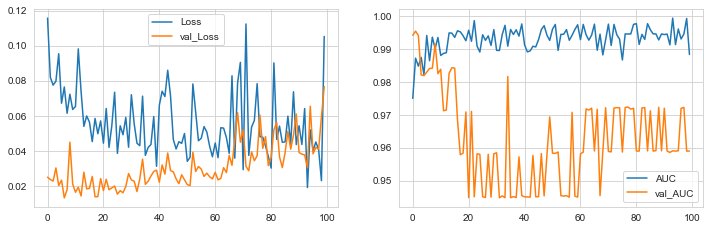

In [102]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_8'], label='AUC')
plt.plot(r.history['val_auc_8'], label='val_AUC')
plt.legend()

In [103]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.63%
_______________________________________________
Classification Report:	Precision Score: 32.21%
			Recall Score: 98.43%
			F1 score: 48.53%
_______________________________________________
Confusion Matrix: 
 [[178447    661]
 [     5    314]]

Test Result:
Accuracy Score: 99.58%
_______________________________________________
Classification Report:	Precision Score: 26.13%
			Recall Score: 88.97%
			F1 score: 40.40%
_______________________________________________
Confusion Matrix: 
 [[84965   342]
 [   15   121]]



# 4. XGBoost

In [ ]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(n_estimators=500)

n_estimators = [100, 250, 500]
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.01, 0.05, 0.1, 0.5, 0.9]
# max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
# min_child_weight = [1, 2, 3, 4]
# weights = [1, 10, 25, 50, 75, 99, 100, 1000]

hyperparameter_grid = {'n_estimators': n_estimators,  
                       'learning_rate' : learning_rate, 
                       'base_score' : base_score,
#                        'min_child_weight' : min_child_weight,
#                        'max_depth': max_depth,
#                        'booster' : booster,  
#                        'scale_pos_weight':weights
                      }

xgb_grid_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="roc_auc", 
                                  n_jobs=-1, verbose=1, cv=3)

# xgb_grid_cv.fit(X_train, y_train)

In [ ]:
# xgb_grid_cv.best_estimator_

In [ ]:
xgb_model = XGBClassifier(n_estimators=500, 
                          learning_rate=0.1, 
                          base_score=0.99)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

# Model Building (Imbalanced Dataset)

In [ ]:
from sklearn.utils import resample

minority_class = df[df.Attrition == 1]
majority_class = df[df.Attrition == 0]

majority_downsample = resample(majority_class, replace=False,     # sample with replacement
                               n_samples=237,    # to match minority class
                               random_state=42) 

data_2 = pd.concat([majority_downsample, minority_class])

data_2.Attrition.value_counts()